In [17]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import SimpleRNN

In [18]:
tf.test.gpu_device_name()


'/device:GPU:0'

In [19]:
import tensorflow as tf 

if tf.test.gpu_device_name(): 
    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))
    print("It should print Default GPU Device: /device:GPU:0")
else:
    print("Please install GPU version of TF")

Default GPU Device:/device:GPU:0
It should print Default GPU Device: /device:GPU:0


In [20]:
# pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113

In [21]:
# import torch
# torch.cuda.is_available()

In [22]:
from tensorflow.python.client import device_lib

def get_available_gpus():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos if x.device_type == 'GPU']

In [23]:
print(get_available_gpus())

['/device:GPU:0', '/device:GPU:1', '/device:GPU:2', '/device:GPU:3']


In [24]:
import tensorflow_addons as tfa

In [25]:
import tqdm
tqdm_callback = tfa.callbacks.TQDMProgressBar()

In [26]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/dwipdalal/bhaiyaar/main/train.csv')

In [27]:
df.head()

,Id,Timestep,Course,Faculty,Expected
0,0,AY1810-AY1811,VX27870,Prof. Jadon Haney,386
1,1,AY1810-AY1811,SN11041,Prof. Kennedy Shields,158
2,2,AY1810-AY1811,CG17623,Prof. Brandon Silva,303
3,3,AY1810-AY1811,GW27856,Prof. Lorena Mays,207
4,4,AY1810-AY1811,SI10212,Prof. Haleigh Romero,329


In [28]:
df.isnull().sum()

Id          0
Timestep    0
Course      0
Faculty     0
Expected    0
dtype: int64

In [29]:
df.shape

(90000, 5)

In [30]:
len(set(df['Faculty']))

560

In [31]:
len(set(df['Timestep']))

177

In [32]:
X = df['Expected']

In [33]:
df.describe()

,Id,Expected
count,90000.000000,90000.000000
mean,44999.500000,548.088644
std,25980.906451,242.426973
min,0.000000,3.000000
25%,22499.750000,371.000000
50%,44999.500000,520.000000
75%,67499.250000,707.000000
max,89999.000000,1444.000000


In [34]:
X_train = X[:81000]
X_test = X[81000:]
train_sales = X_train
test_sales = X_test

In [35]:
import matplotlib.pyplot as plt

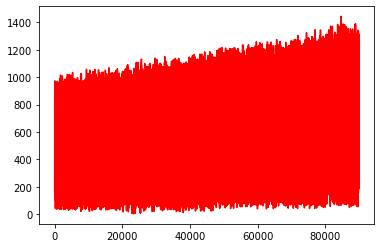

In [36]:
x = range(len(X))
plt.plot(x, X, 'r-', label='expectation')

In [37]:
EPOCHS = 100
BATCH_SIZE = 16
TRAIN_TEST_SPLIT = 0.8
MIN = 12

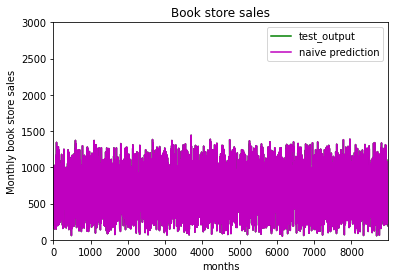

In [38]:
test_output=  test_sales[MIN:]
naive_prediction = test_sales[MIN-1:-1]
x = range(len(test_output))
plt.plot(x, test_output, 'g-', label='test_output')
plt.plot(x, naive_prediction, 'm-', label='naive prediction')
plt.title('Book store sales')
plt.axis([0, len(test_output), 0.0, 3000.0])
plt.xlabel('months')
plt.ylabel('Monthly book store sales')
plt.legend()
plt.show()


In [39]:
# Standardize train and test data.
# Use only training seasons to compute mean and stddev.
import numpy as np
mean = np.mean(train_sales)
stddev = np.std(train_sales)
train_sales_std = (train_sales - mean)/stddev
test_sales_std = (test_sales - mean)/stddev

In [40]:
print(train_sales_std)
print(test_sales_std)

0       -0.642193
1       -1.605602
2       -0.992908
3       -1.398554
4       -0.883045
           ...   
80995    1.314204
80996    2.121271
80997    1.567733
80998    1.622664
80999   -1.001359
Name: Expected, Length: 81000, dtype: float64
81000   -0.439370
81001    0.494461
81002    0.325442
81003    0.600098
81004   -0.270351
           ...   
89995   -0.261900
89996   -1.335172
89997   -1.026712
89998   -1.483063
89999    2.387476
Name: Expected, Length: 9000, dtype: float64


In [41]:
# Create training examples.
train_months = len(train_sales)
train_X = np.zeros((train_months-MIN, train_months-1, 1))
train_y = np.zeros((train_months-MIN, 1))
print(train_X.shape)
print(train_y.shape)
for i in range(0, train_months-MIN):
 train_X[i, -(i+MIN):, 0] = train_sales_std[0:i+MIN]
 train_y[i, 0] = train_sales_std[i+MIN]

(80988, 80999, 1)
(80988, 1)


In [42]:
train_X

array([[[ 0.        ],
        [ 0.        ],
        [ 0.        ],
        ...,
        [-1.07319186],
        [-1.01403515],
        [-0.39288967]],

       [[ 0.        ],
        [ 0.        ],
        [ 0.        ],
        ...,
        [-1.01403515],
        [-0.39288967],
        [-0.04217488]],

       [[ 0.        ],
        [ 0.        ],
        [ 0.        ],
        ...,
        [-0.39288967],
        [-0.04217488],
        [-0.86614337]],

       ...,

       [[ 0.        ],
        [ 0.        ],
        [-0.64219296],
        ...,
        [ 2.22690759],
        [ 1.31420403],
        [ 2.1212706 ]],

       [[ 0.        ],
        [-0.64219296],
        [-1.60560227],
        ...,
        [ 1.31420403],
        [ 2.1212706 ],
        [ 1.56773279]],

       [[-0.64219296],
        [-1.60560227],
        [-0.99290775],
        ...,
        [ 2.1212706 ],
        [ 1.56773279],
        [ 1.62266403]]])

In [43]:
test_sales_std

81000   -0.439370
81001    0.494461
81002    0.325442
81003    0.600098
81004   -0.270351
           ...   
89995   -0.261900
89996   -1.335172
89997   -1.026712
89998   -1.483063
89999    2.387476
Name: Expected, Length: 9000, dtype: float64

In [44]:
# Create test examples.
test_months = len(test_sales)
test_X = np.zeros((test_months-MIN, test_months-1, 1))
test_y = np.zeros((test_months-MIN, 1))
for i in range(0, test_months-MIN):
 test_X[i, -(i+MIN):, 0] = test_sales_std[0:i+MIN]
 test_y[i, 0] = test_sales_std[i+MIN+len(train_sales_std)]

In [45]:
EPOCHS = 2
BATCH_SIZE = 16
TRAIN_TEST_SPLIT = 0.8
MIN = 12

In [46]:
model = Sequential()
model.add(SimpleRNN(128, activation='relu',input_shape=(None, 1)))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer = 'adam',
metrics =['mean_absolute_error'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 128)               16640     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 16,769
Trainable params: 16,769
Non-trainable params: 0
_________________________________________________________________


In [47]:
train_X = tf.convert_to_tensor(train_X,dtype=tf.float32)
train_y = tf.convert_to_tensor(train_y,dtype=tf.float32)

In [49]:
from tensorflow.python.client import device_lib 
# print(device_lib.list_local_devices()) 

In [50]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:2', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:3', device_type='GPU')]

In [51]:
tf.debugging.set_log_device_placement(True)
a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
c = tf.matmul(a, b)


In [52]:
print(c)

tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)


In [ ]:
train_X = train_X
train_y = train_y
    
history = model.fit(train_X, train_y, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=2, shuffle=True, callbacks=[tqdm_callback])

Training:   0%|           0/2 ETA: ?s,  ?epochs/s

Epoch 1/2


0/5062           ETA: ?s - 

Epoch 1/2


In [ ]:
test_output = test_sales_std[MIN:]
naive_prediction = test_sales_std[MIN-1:-1]

mean_squared_error = np.mean(np.square(naive_prediction - test_output))
mean_abs_error = np.mean(np.abs(naive_prediction - test_output))

print('naive test mse: ', mean_squared_error)
print('naive test mean abs: ', mean_abs_error)

In [ ]:
predicted_test = model.predict(test_X, len(test_X))
import sklearn
from sklearn.metrics import mean_squared_error

In [ ]:
print(sklearn.metrics.mean_squared_error(test_y,predicted_test, squared= False))

In [ ]:
from numba import vectorize, jit, cuda 
import numpy as np 
# to measure exec time 
from timeit import default_timer as timer 

# normal function to run on cpu 
def func(a):                                 
    for i in range(10000000): 
        a[i]+= 1    

# function optimized to run on gpu 
@vectorize(['float64(float64)'], target ="cuda")                         
def func2(x): 
    return x+1

if __name__=="__main__": 
    n = 10000000                            
    a = np.ones(n, dtype = np.float64) 

    start = timer() 
    func(a) 
    print("without GPU:", timer()-start)     

    start = timer() 
    func2(a) 
    print("with GPU:", timer()-start)